In [1]:
import numpy as np
import pandas as pd
from einsteinpy.geodesic import Geodesic, Timelike, Nulllike
from einsteinpy.plotting import GeodesicPlotter, StaticGeodesicPlotter, InteractiveGeodesicPlotter
from einsteinpy.coordinates.utils import spherical_to_cartesian_fast

In [2]:
r = 4
theta = np.pi/2 # equatorial x-y plane 
phi = 0         # on x-axis

alpha = 70 # degree deflection of -r hat direction in the x-y plane (toward the y axis) -> phi
beta = 70 # degree deflection of -r hat direction in the x-z plane (toward the z axis) -> theta
# p_theta = pi/2 - beta
# p_phi = pi - alpha
# p_r: 1

p_r = 1
p_theta = np.pi/2 - np.deg2rad(beta)
p_phi = np.pi - np.deg2rad(alpha)

In [3]:
# Double check: p_r, p_theta, p_phi should be unit vectors
_ , p_x, p_y, p_z = spherical_to_cartesian_fast(0, p_r, p_theta, p_phi)
print(f"p_r: {p_r}, p_theta: {np.degrees(p_theta)}, p_phi: {np.degrees(p_phi)}, norm: {np.linalg.norm([p_x, p_y, p_z])}")

p_r: 1, p_theta: 20.000000000000004, p_phi: 110.0, norm: 0.9999999999999999


In [4]:

q0 = [r, theta, phi]
# p0 = [p_r, p_theta, p_phi]
p0 = [0,1,0]
a = 0. # Schwarzschild Black Hole


print("Starting geodesic integration...")
# geodesic object (contains trajectory data)

geod = Nulllike(
    metric = "Schwarzschild",
    metric_params = (a,),
    position=q0, 
    momentum=p0, #thing will automatically calculate the time-componenet, given our 3-momentum to satisfy the null condition
    steps=10000, # As close as we can get before the integration becomes highly unstable
    delta=0.001,
    return_cartesian=True,
    omega=0.01, # Small omega values lead to more stable integration
    suppress_warnings=True, # Uncomment to view the tolerance warning
)

#save the trajectory data
traj = geod.trajectory

Starting geodesic integration...


KeyboardInterrupt: 

In [88]:
type(traj)

tuple

In [89]:
traj[1][0]
#t, x, y, z, pt, pr, pth, pph

array([ 1.21481696e-03,  4.00049998e+00,  4.79965542e-04, -8.72664625e-05,
       -6.07446442e-01,  9.99904773e-01,  3.49065848e-01,  1.91986218e+00])

In [90]:
# get into df
#t, x, y, z, pt, pr, pth, pph
df = pd.DataFrame(traj[1], columns=[ "t", "x", "y", "z", "pt", "pr", "pth", "pph"])
# append new column with position norm
df["r"] = np.linalg.norm(df[["x", "y", "z"]], axis=1)
df.head()

,t,x,y,z,pt,pr,pth,pph,r
0,0.001215,4.000500,0.00048,-0.000087,-0.607446,0.999905,0.349066,1.919862,4.0005
1,0.002429,4.001000,0.00096,-0.000175,-0.607446,0.999810,0.349066,1.919862,4.0010
2,0.003644,4.001500,0.00144,-0.000262,-0.607446,0.999714,0.349066,1.919862,4.0015
3,0.004858,4.002000,0.00192,-0.000349,-0.607446,0.999619,0.349066,1.919862,4.0020
4,0.006073,4.002499,0.00240,-0.000436,-0.607446,0.999524,0.349066,1.919862,4.0025


In [91]:
gpl = GeodesicPlotter()
gpl.plot(geod, color="green")
#zoom in on 10,10,10
# gpl.fig.update_layout(
#     scene_camera=dict(
#         eye=dict(x=10, y=10, z=10)
#     )
# )
gpl.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0, '#000'], [1, '#000']],
              'name': 'BH Event Horizon (Outer)',
              'opacity': 0.75,
              'showlegend': True,
              'showscale': False,
              'type': 'surface',
              'x': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'rtYRKxPF7PdCYOgbE8B1wUMyamsTw='),
                    'dtype': 'f8',
                    'shape': '50, 50'},
              'y': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... '9xMuiRvNt5hhAlDoK8SF2Khc53c7k='),
                    'dtype': 'f8',
                    'shape': '50, 50'},
              'z': {'bdata': ('AAAAAAAAAEAAAAAAAAAAQAAAAAAAAA' ... 'AAAAAAwAAAAAAAAADAAAAAAAAAAMA='),
                    'dtype': 'f8',
                    'shape': '50, 50'}},
             {'colorscale': [[0, '#FFC'], [1, '#FFC']],
              'name': 'BH Ergosphere (Outer)',
              'opacity': 0.5,
              'showlegend': True,
              'showscale': False,
              'type': 'surface',
              'x': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... '9xMuiRvNt5hhAlDoK8SF2Khc53c7k='),
                    'dtype': 'f8',
                    'shape': '50, 50'},
              'y': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'rtYRKxPF7PdCYOgbE8B1wUMyamsTw='),
                    'dtype': 'f8',
                    'shape': '50, 50'},
              'z': {'bdata': ('AAAAAAAAAEAAAAAAAAAAQAAAAAAAAA' ... 'AAAAAAwAAAAAAAAADAAAAAAAAAAMA='),
                    'dtype': 'f8',
                    'shape': '50, 50'}},
             {'line': {'color': 'green', 'width': 2},
              'marker': {'size': 1},
              'name': 'Null-like Geodesic',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('EUzvEIMAEED1YeAeBgEQQLSj0ymJAR' ... 'slv3MgQBESGWrzcyBAqTHMrid0IEA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('poJ6Tnx0Pz+ucYlLfHRPPzM4+jRdl1' ... 'FzT7gSQEjWYxvIuBJArwrqwkC5EkA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('bDTHaFrgFr/z7aNmWuAmv8zRTspDKD' ... 'Qdojrrv6kXFZ1RO+u/h/VjHAE8678='),
                    'dtype': 'f8'}}],
    'layout': {'scene': {'xaxis': {'title': {'text': 'X (GM/c^2)'}},
                         'yaxis': {'title': {'text': 'Y (GM/c^2)'}},
                         'zaxis': {'title': {'text': 'Z (GM/c^2)'}}},
               'template': '...',
               'title': {'text': 'Geodesic Plot', 'x': 0.46, 'xanchor': 'center', 'y': 0.9, 'yanchor': 'top'}}
})

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection


def _make_colour_segments(xs, ys, zs=None, cmap=cm.plasma):
    """
    Split a poly-line into segments and colour them by index.
    Works for both 2-D (zs=None) and 3-D.
    """
    pts = np.column_stack((xs, ys)) if zs is None else np.column_stack((xs, ys, zs))
    segs = np.stack([pts[:-1], pts[1:]], axis=1)
    norm  = plt.Normalize(0, len(xs) - 1)
    rgba  = cmap(norm(np.arange(len(xs) - 1)))
    cls   = LineCollection if zs is None else Line3DCollection
    lc    = cls(segs, colors=rgba, linewidth=2)
    return lc, norm, cmap


def plot_geodesic_df(df, *, cmap=cm.plasma):
    """
    Build the 4-panel diagnostic figure from a DataFrame
    with columns [t, x, y, z, pt, pr, pth, pph].
    """
    # ── 1) unpack arrays ─────────────────────────────────────────────
    t  = df["t"].values
    xs = df["x"].values
    ys = df["y"].values
    zs = df["z"].values

    # ── 2) orbital-plane basis ( r₀ × v ) ────────────────────────────
    r0_vec = np.array([xs[0], ys[0], zs[0]])
    if len(xs) > 1:
        v_vec = np.array([xs[1]-xs[0], ys[1]-ys[0], zs[1]-zs[0]])
    else:                       # fallback: use last–first if only 1 sample
        v_vec = r0_vec

    n_hat = np.cross(r0_vec, v_vec)
    if np.linalg.norm(n_hat) < 1e-12:         # radial case
        n_hat = np.array([0., 0., 1.])
    n_hat /= np.linalg.norm(n_hat)

    e1 = r0_vec - np.dot(r0_vec, n_hat) * n_hat
    e1 /= np.linalg.norm(e1)
    e2 = np.cross(n_hat, e1)

    u = xs*e1[0] + ys*e1[1] + zs*e1[2]
    v = xs*e2[0] + ys*e2[1] + zs*e2[2]

    # ── 3) colour normalisation (shared) ─────────────────────────────
    norm = plt.Normalize(0, len(xs) - 1)

    # ── 4) figure layout ─────────────────────────────────────────────
    fig = plt.figure(figsize=(10, 8))

    # 3-D panel
    ax3d = fig.add_subplot(221, projection="3d")
    lc3d, _, _ = _make_colour_segments(xs, ys, zs, cmap=cmap)
    ax3d.add_collection3d(lc3d)
    ax3d.scatter(0, 0, 0, c="k", s=40)           # BH
    ax3d.scatter(xs[0], ys[0], zs[0], c="r", s=25, label="start")
    ax3d.set_xlabel("x"); ax3d.set_ylabel("y"); ax3d.set_zlabel("z")
    ax3d.set_title("3-D trajectory")
    ax3d.legend()

    # x-y panel
    ax_xy = fig.add_subplot(222)
    lc_xy, _, _ = _make_colour_segments(xs, ys, cmap=cmap)
    ax_xy.add_collection(lc_xy)
    ax_xy.scatter(0, 0, c="k", s=8)
    ax_xy.set_xlabel("x"); ax_xy.set_ylabel("y"); ax_xy.set_title("x-y")
    ax_xy.axis("equal"); ax_xy.autoscale()

    # x-z panel
    ax_xz = fig.add_subplot(223)
    lc_xz, _, _ = _make_colour_segments(xs, zs, cmap=cmap)
    ax_xz.add_collection(lc_xz)
    ax_xz.scatter(0, 0, c="k", s=8)
    ax_xz.set_xlabel("x"); ax_xz.set_ylabel("z"); ax_xz.set_title("x-z")
    ax_xz.axis("equal"); ax_xz.autoscale()

    # polar orbital-plane panel
    r_plane = np.hypot(u, v)
    th_plane = np.arctan2(v, u)
    ax_pol = fig.add_subplot(224, projection="polar")
    sc = ax_pol.scatter(th_plane, r_plane,
                        c=np.arange(len(th_plane)), cmap=cmap, s=4, norm=norm)
    ax_pol.set_title("orbital plane (r,θ’)")

    # shared colour-bar
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.68])
    plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
                 cax=cax, label="index 0 → … → final (time)")

    fig.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()


# —— example usage ————————————————————————————————————————————————
#   plot_geodesic_df(df)


/tmp/ipykernel_484894/2914858369.py:97: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



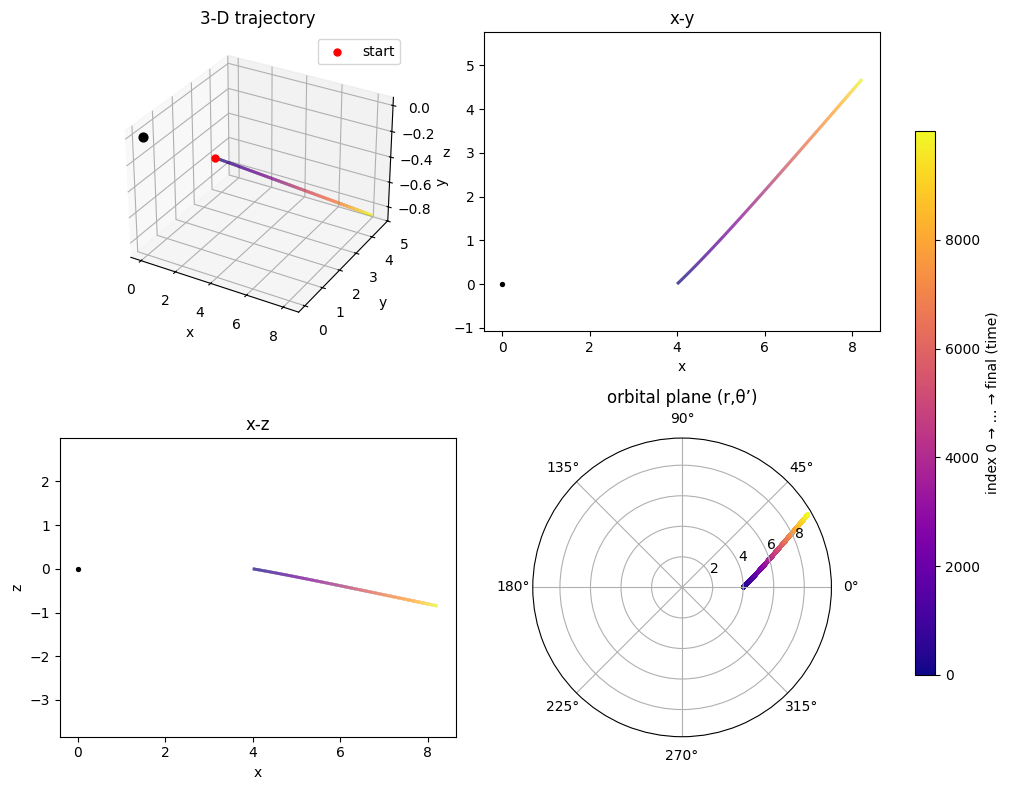

In [93]:
plot_geodesic_df(df)